In [6]:
import u3
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [7]:
class robot:
    
    def __init__(self):
        self.labjack = u3.U3()
        self.__resistance = 500
        
    def close(self):
        self.labjack.close()
                            
    def printAnalogIns(self):
        AIN0value = self.labjack.getAIN(0)
        AIN1value = self.labjack.getAIN(1)
        descriptor ='A0 = %5.3f volts, A1 = %5.3f volts ' % (AIN0value, AIN1value)
        print(descriptor)
       
    def setDAC0(self,voltage = 0):
        if voltage < 0:
            print('output voltage must be >= 0')
            return
        elif voltage > 5:
            print('output voltage must be <= 5')
            return
        else:
            DAC0_VALUE = self.labjack.voltageToDACBits(voltage, dacNumber = 0, is16Bits = False)
            self.labjack.getFeedback(u3.DAC0_8(DAC0_VALUE))
        
    def blink(self, n = 3):
        while n > 0:
            n-=1
            self.setDAC0(2)
            sleep(1)
            self.setDAC0(0)
            sleep(1)
    
    def takeIVCurve(self, maxVoltage = 5, deltaVoltage = 0.1, verbose = 0):
        setVoltages = np.arange(0,maxVoltage,deltaVoltage)
        currents = np.zeros(len(setVoltages))
        diodeVoltages = np.zeros(len(setVoltages))
        for i in range(len(setVoltages)):
            thisVoltage = setVoltages[i]
            self.setDAC0(thisVoltage)
            sleep(0.05)
            topVoltage = self.labjack.getAIN(0)
            midVoltage = self.labjack.getAIN(1)
            diodeVoltages[i] = midVoltage;
            currents[i] = (topVoltage - midVoltage)/self.__resistance
        
        plt.figure('Diode I-V curve')
        plt.plot(diodeVoltages,currents)
        plt.xlabel('diode voltage')
        plt.ylabel('diode current')
        plt.show()
        if verbose:
            
            plt.figure('Input voltages')
            plt.plot(setVoltages,diodeVoltages)
            plt.xlabel('DAC setpoint')
            plt.ylabel('measured output voltage')
            plt.show()
        
    def getRGYData(self, maxVoltage = 5, deltaVoltage = 0.1):
        trials = 3
        dataFiles = ['y-','g-','r-']
        while trials > 0:
            trials -= 1
            input('click \"Enter\" when ready')
            setVoltages = np.arange(0,maxVoltage,deltaVoltage)
            currents = np.zeros(len(setVoltages))
            diodeVoltages = np.zeros(len(setVoltages))
            for i in range(len(setVoltages)):
                thisVoltage = setVoltages[i]
                self.setDAC0(thisVoltage)
                sleep(0.05)
                topVoltage = self.labjack.getAIN(0)
                midVoltage = self.labjack.getAIN(1)
                diodeVoltages[i] = midVoltage;
                currents[i] = (topVoltage - midVoltage)/self.__resistance
            self.setDAC0(0)
            aData=open(dataFiles[trials],'wb')
            pickle.dump([diodeVoltages,currents],aData)
            aData.close()
        
        plt.figure("I-V diagram for LED")
        while trials < 3:
            aData=open(dataFiles[trials],'rb')
            xData, yData = pickle.load(aData)
            aData.close()
            plt.plot(xData, yData, dataFiles[trials], label=dataFiles[trials])
            trials += 1
        plt.plot(1.78, 0, 'r.', label='red photon energy')
        plt.plot(2.48, 0, 'g.', label='green photon energy')
        plt.plot(2.16, 0, 'y.', label='yellow photon energy')
        plt.xlabel("LED Voltage (V)")
        plt.ylabel("current (A)")
        plt.legend()
        plt.show()
        

In [11]:
myRobot = robot()

AttributeError: 'NoneType' object has no attribute 'OpenLabJack'

In [9]:
myRobot.takeIVCurve(verbose=0)

NameError: name 'myRobot' is not defined

In [10]:
myRobot.setDAC0(0)

NameError: name 'myRobot' is not defined

click "Enter" when ready 
click "Enter" when ready 
click "Enter" when ready 


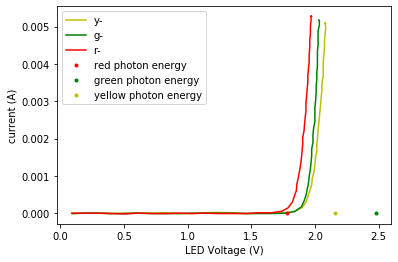

In [66]:
myRobot.getRGYData()

In [21]:
myRobot.close()

In [ ]:
fr=open('rDataLED.txt','wb')
fy=open('yDataLED.txt','wb')
fg=open('gDataLED.txt','wb')

In [ ]:
pickle.dump(myRobot.takeIVData(deltaVoltage=0.01),fr)

In [ ]:
pickle.dump(myRobot.takeIVData(deltaVoltage=0.01),fy)

In [ ]:
pickle.dump(myRobot.takeIVData(deltaVoltage=0.01),fg)

In [ ]:
fr.close()
fy.close()
fg.close()

In [ ]:
myRobot.close()

In [ ]:
fr=open('rDataLED.txt','rb')
fy=open('yDataLED.txt','rb')
fg=open('gDataLED.txt','rb')

In [ ]:
xData, rIData = pickle.load(fr)
xData, yIData = pickle.load(fy)
xData, gIData = pickle.load(fg)

In [ ]:
fr.close()
fy.close()
fg.close()

In [ ]:
plt.figure("I-V diagram for LED")
plt.plot(xData[250:], gIData[250:], 'g-', label='Green')
plt.plot(xData[250:], yIData[250:], 'y-', label='Yellow')
plt.plot(xData[250:], rIData[250:], 'r-', label='Red')
plt.xlabel("LED Voltage (V)")
plt.ylabel("current (A)")
plt.legend()
plt.show()

In [ ]:
#xData, rIData, yIData, gIData

In [ ]:
arr=[1,2,3,4,5]

In [ ]:
arr[2:-1]

In [ ]:
len(xData)

In [ ]:
p

In [ ]:
gIData[-10]

In [7]:
myRobot.printAnalogIns()

A0 = 0.090 volts, A1 = 0.090 volts 


In [ ]:
myRobot.blink()

In [ ]:
myRobot.close()

In [ ]:
%debug robot

In [8]:
d = u3.U3()

In [9]:
d.configU3()

{'FirmwareVersion': '1.46',
 'BootloaderVersion': '0.27',
 'HardwareVersion': '1.30',
 'SerialNumber': 320095542,
 'ProductID': 3,
 'LocalID': 1,
 'TimerCounterMask': 64,
 'FIOAnalog': 31,
 'FIODirection': 0,
 'FIOState': 0,
 'EIOAnalog': 0,
 'EIODirection': 0,
 'EIOState': 0,
 'CIODirection': 0,
 'CIOState': 0,
 'DAC1Enable': 1,
 'DAC0': 0,
 'DAC1': 0,
 'TimerClockConfig': 2,
 'TimerClockDivisor': 256,
 'CompatibilityOptions': 0,
 'VersionInfo': 18,
 'DeviceName': 'U3-HV'}

In [10]:
def getAnalogVolt():
    print('AIN0 = '+str(d.getAIN(0))+' volts, AIN0 = '+str(d.getAIN(1))+' volts')

In [11]:
getAnalogVolt()

AIN0 = 0.08963199999999816 volts, AIN0 = 0.08963199999999816 volts


In [15]:
def setDAC0(voltage):
    if voltage > 5 or voltage < 0:
        print('voltage out of bounds (0 < voltage < 5)')
    DAC0_VALUE = d.voltageToDACBits(voltage, dacNumber = 0, is16Bits = False)
    d.getFeedback(u3.DAC0_8(DAC0_VALUE))

In [22]:
setDAC0(0)

In [17]:
def blink(n=3):
    while n > 0:
        n-=1
        setDAC0(2)
        sleep(1)
        setDAC0(0)
        sleep(1)

In [18]:
blink()

In [ ]:
#for x in range(0,50,1):
#    setDAC0(x/10)
#    print(x/10)
#    print(getAnalogVolt())

In [ ]:
#d.getCalibrationData()

In [23]:
d.close()

In [ ]:
import u3
import time
import numpy as np
import matplotlib.pyplot as plt

class robot:
    def __init__(self):
        self.labjack = u3.U3()
        
        self.resistance = 500  #in Ohms
        
    def close(self):
        self.labjack.close()
                            
    def printAnalogIns(self):
        
        AIN0value = self.labjack.getAIN(0)
        AIN1value = self.labjack.getAIN(1)
        descriptor ='A0 = %5.3f volts, A1 = %5.3f volts ' % (AIN0value, AIN1value)
        print(descriptor)
       
    def setDAC0(self,voltage = 0):
        if voltage < 0:
            print('output voltage must be >= 0')
            return
        if voltage > 5:
            print('output voltage must be <= 5')
            return
        
        DAC0_VALUE = self.labjack.voltageToDACBits(voltage, dacNumber = 0, is16Bits = False)
        self.labjack.getFeedback(u3.DAC0_8(DAC0_VALUE))
       
    def blink(self,numBlinks = 3):
        for i in range(numBlinks):
            self.setDAC0(3)
            time.sleep(0.5)
            self.setDAC0(0)
            time.sleep(0.5)
    def digitalBlink(self,numBlinks = 3):
        for i in range(numBlinks):
            self.labjack.setFIOState(4,0)
            time.sleep(0.5)
            self.labjack.setFIOState(4,1)
            time.sleep(0.5)          
    def takeIVCurve(self, maxVoltage = 5,
                          deltaVoltage = 0.1,
                          verbose = 0):
        setVoltages = np.arange(0,maxVoltage,deltaVoltage)
        currents = np.zeros(len(setVoltages))
        diodeVoltages = np.zeros(len(setVoltages))
        for i in range(len(setVoltages)):
            thisVoltage = setVoltages[i]
            self.setDAC0(thisVoltage)
            time.sleep(0.05)
            topVoltage = self.labjack.getAIN(0)
            midVoltage = self.labjack.getAIN(1)
            diodeVoltages[i] = midVoltage;
            currents[i] = (topVoltage - midVoltage)/self.resistance
        
        plt.figure('Diode I-V curve')
        plt.plot(diodeVoltages,currents)
        plt.xlabel('diode voltage')
        plt.ylabel('diode current')
        plt.show()
        if verbose:
            
            plt.figure('Input voltages')
            plt.plot(setVoltages,diodeVoltages)
            plt.xlabel('DAC setpoint')
            plt.ylabel('measured output voltage')
            plt.show()
            

In [ ]:
myRobot = robot()
myRobot.takeIVCurve(verbose = 1)
#myRobot.blink()
myRobot.close()